In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import nsepy
from nsetools import Nse


In [38]:
from datetime import datetime, date

# df = nsepy.get_history(symbol='infy', start=date(2015, 1, 1), end=date(2023, 1, 5))
df = pd.read_csv('AAPL.csv')

In [39]:
df


,date,close,high,low,open,volume
0,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246
1,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309
2,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452
3,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797
4,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627
...,...,...,...,...,...,...
1253,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125
1254,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385
1255,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215
1256,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211


In [40]:
# close = df['Close']
close = df['close']

In [41]:
close


0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [42]:
np.array(close)

array([132.045, 131.78 , 130.28 , ..., 319.23 , 316.85 , 318.89 ])

In [43]:
print(len(close), close.shape)


1258 (1258,)


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
close = scaler.fit_transform(np.array(close).reshape(-1,1))

In [46]:
print(max(close), min(close))
print(close)



[1.] [0.]
[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [47]:
trainlist = []
for i in range (100):
    trainlist.append(close[i].tolist())


In [48]:
trainlist

[[0.1760744743730473],
 [0.17495567001604323],
 [0.16862281516507643],
 [0.1696994004897408],
 [0.1672718061302036],
 [0.16794731064763996],
 [0.1647386641898168],
 [0.16174111289369247],
 [0.15815249514481128],
 [0.1565481719158997],
 [0.16271215063750738],
 [0.16148779869965385],
 [0.1554926961074053],
 [0.15443722029891077],
 [0.15730811449801568],
 [0.15604154352782235],
 [0.15849024740352952],
 [0.15308621126403782],
 [0.1573503335303555],
 [0.15490162965464832],
 [0.15946128514734453],
 [0.15688592417461794],
 [0.1537194967491345],
 [0.14434687156970366],
 [0.14812547496411382],
 [0.15308621126403782],
 [0.15241070674660134],
 [0.15055306932365115],
 [0.149244279321118],
 [0.13607194123110694],
 [0.12551718314616228],
 [0.13906949252723128],
 [0.14911762222409858],
 [0.14890652706239976],
 [0.15401502997551292],
 [0.1611500464409355],
 [0.16583635903065103],
 [0.17618002195389676],
 [0.17060710968504605],
 [0.14725998480114838],
 [0.14700667060710965],
 [0.14422021447268435],
 [0

In [49]:
testlist = []
testlist.append(close[100][0])

In [50]:
testlist

[0.08739339694334208]

In [51]:
finaltrain = []
finaltrain.append(trainlist)
finaltest = []
finaltest.append(testlist)
for i in range (100, len(close)-1):
    trainlist1 = trainlist
    trainlist1.pop(0)
    trainlist1.append(close[i].tolist())
    finaltrain.append(trainlist1)
    trainlist = trainlist1
    finaltest.append(close[i+1].tolist())


In [52]:
np.array(finaltest).shape



(1158, 1)

In [53]:
finaltrain

[[[0.8493624926116694],
  [0.8583551465000423],
  [0.8866418981676942],
  [0.8743139407244789],
  [0.8843198513890065],
  [0.8783669678290975],
  [0.8986321033521913],
  [0.925821160179009],
  [0.9287764924427933],
  [0.9567677108840666],
  [0.9386979650426415],
  [0.933040614709111],
  [0.9495060373216249],
  [0.9642404796082076],
  [0.9551211686228154],
  [0.9598919192772104],
  [0.9663514312251966],
  [0.9624672802499368],
  [0.9229502659799038],
  [0.9598497002448705],
  [0.9879253567508233],
  [0.985941062230854],
  [0.9253145317909315],
  [0.9217259140420504],
  [0.964747107996285],
  [0.9757240564046274],
  [0.9915984125643842],
  [0.9697289538123788],
  [0.9761462467280253],
  [0.9679557544541082],
  [1.0000000000000002],
  [0.9901629654648318],
  [0.9905007177235499],
  [0.9653803934813816],
  [0.9848855864223593],
  [0.9708688676855528],
  [0.9402600692392133],
  [0.8774803681499621],
  [0.8348391454867856],
  [0.8541332432660644],
  [0.7733682344000676],
  [0.772692729882631

In [54]:
finaltrain = np.array(finaltrain)
finaltest = np.array(finaltest)

In [55]:
li = len(close)
trainsize = int(li*0.7)
testsize = li-trainsize

trainx, trainy, testx, testy = finaltrain[0:trainsize, : ], finaltest[0:trainsize, : ], finaltrain[trainsize:li, :], finaltest[trainsize:li, :]

In [56]:
trainx = []
trainy = []
testx = []
testy = []

for i in range(0, trainsize):
    trainx.append(finaltrain[i])
    trainy.append(finaltest[i])


for i in range(trainsize, len(finaltrain)):
    testx.append(finaltrain[i])
    testy.append(finaltest[i])



In [57]:
print(np.array(trainx).shape)

(880, 100, 1)


In [58]:
print(np.array(testx).shape, np.array(trainy).shape)


(278, 100, 1) (880, 1)


In [59]:
import tensorflow as tf

# from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [60]:
from tensorflow.keras import models

In [61]:
# model1 = models.Sequential()

In [62]:
from tensorflow.keras.layers import Bidirectional

In [63]:
# model.add(Bidirectional(LSTM(100, return_sequences = True, input_shape = (100,1))))
# model.add(Bidirectional(LSTM(100, return_sequences = True)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
# model.build(input_shape=(1320,100, 1))

In [65]:
# model.summary()

In [66]:
# model.fit(trainx)

In [67]:
# his = model.fit(trainx, trainy, validation_data=(testx,testy),epochs=10,batch_size=64)


In [68]:
model1=models.Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))

model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')


In [69]:
model1.summary()
trainy = np.array(trainy).T[0]
testy = np.array(testy).T[0]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [70]:
print(trainy.shape, testy.shape)
trainx = np.array(trainx)
testx = np.array(testx)

(880,) (278,)


In [71]:
print(trainy.shape, testy.shape, trainx.shape, testx.shape)

(880,) (278,) (880, 100, 1) (278, 100, 1)


In [72]:
his = model1.fit(trainx, trainy, validation_data=(testx, testy), batch_size=64, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 36s 720ms/step - loss: 0.0403 - val_loss: 0.2743
Epoch 2/100
14/14 [==============================] - 6s 398ms/step - loss: 0.0265 - val_loss: 0.1883
Epoch 3/100
14/14 [==============================] - 5s 390ms/step - loss: 0.0245 - val_loss: 0.2160
Epoch 4/100
14/14 [==============================] - 5s 380ms/step - loss: 0.0244 - val_loss: 0.2043
Epoch 5/100
14/14 [==============================] - 6s 413ms/step - loss: 0.0244 - val_loss: 0.2084
Epoch 6/100
14/14 [==============================] - 5s 382ms/step - loss: 0.0244 - val_loss: 0.2065
Epoch 7/100
14/14 [==============================] - 5s 375ms/step - loss: 0.0244 - val_loss: 0.2198
Epoch 8/100
14/14 [==============================] - 5s 360ms/step - loss: 0.0249 - val_loss: 0.2034
Epoch 9/100
14/14 [==============================] - 4s 291ms/step - loss: 0.0244 - val_loss: 0.2013
Epoch 10/100
14/14 [==============================] - 4s 273ms/step - loss: 0.0246 - val_l

In [73]:
model1.predict(np.array(testx[0]).reshape(1,100,1))

# testx[0].shape

1/1 [==============================] - 5s 5s/step


array([[0.25354436]], dtype=float32)

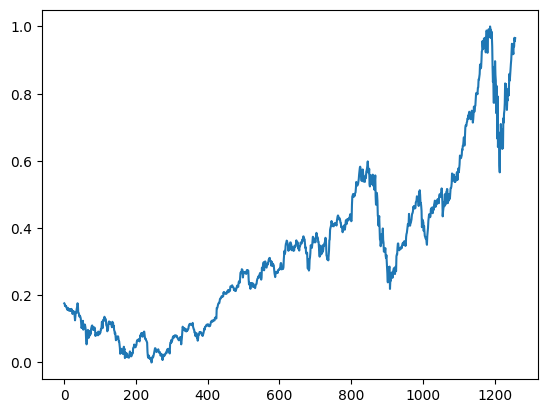

In [74]:
import matplotlib.pyplot as plt 
plt.plot(close)

In [75]:
test = close[1100:1258, :]

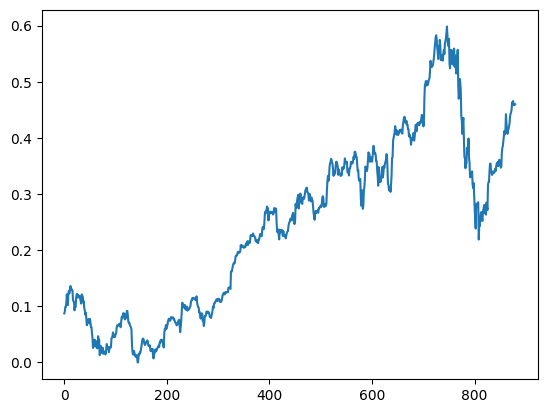

In [76]:
plt.plot(trainy)

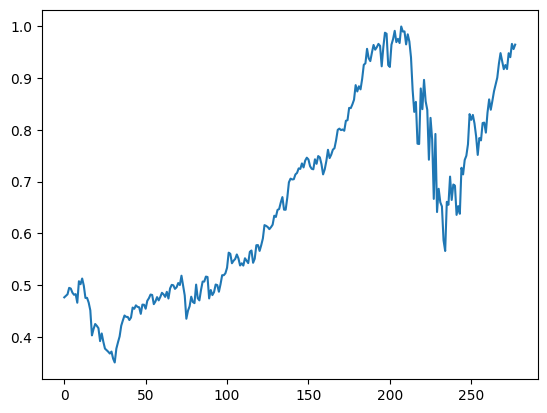

In [77]:
plt.plot(testy)

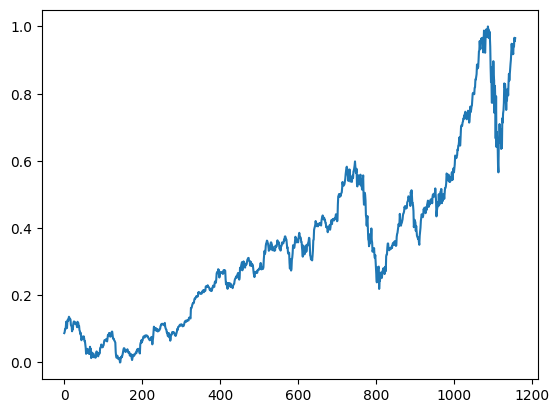

In [78]:
abc = np.concatenate((trainy, testy))
plt.plot(abc)

In [79]:
testy1 = []
testxxx = np.array(testx[0])
type(testxxx)
testxxx.tolist()



[[0.8493624926116694],
 [0.8583551465000423],
 [0.8866418981676942],
 [0.8743139407244789],
 [0.8843198513890065],
 [0.8783669678290975],
 [0.8986321033521913],
 [0.925821160179009],
 [0.9287764924427933],
 [0.9567677108840666],
 [0.9386979650426415],
 [0.933040614709111],
 [0.9495060373216249],
 [0.9642404796082076],
 [0.9551211686228154],
 [0.9598919192772104],
 [0.9663514312251966],
 [0.9624672802499368],
 [0.9229502659799038],
 [0.9598497002448705],
 [0.9879253567508233],
 [0.985941062230854],
 [0.9253145317909315],
 [0.9217259140420504],
 [0.964747107996285],
 [0.9757240564046274],
 [0.9915984125643842],
 [0.9697289538123788],
 [0.9761462467280253],
 [0.9679557544541082],
 [1.0000000000000002],
 [0.9901629654648318],
 [0.9905007177235499],
 [0.9653803934813816],
 [0.9848855864223593],
 [0.9708688676855528],
 [0.9402600692392133],
 [0.8774803681499621],
 [0.8348391454867856],
 [0.8541332432660644],
 [0.7733682344000676],
 [0.7726927298826314],
 [0.8801401671873683],
 [0.84007430549

In [80]:
for i in range(len(testy)):
    abc = model1.predict(testxxx.reshape(1,100,1))
    # print(abc)
    testxxx = testxxx.tolist()
    testxxx.pop(0)
    # print(type(testxxx[23]))
    # print()
    # print(abc[0].tolist())
    testxxx.append(abc[0].tolist())

    testxxx = np.array(testxxx)
    testxxx.shape
    # print(testxxx)
    testy1.append(abc[0])

1/1 [==============================] - 0s 71ms/step


In [81]:
ans = []

for i in testy1:
    # i = i[0].tolist()
    ans.append(i.tolist()[0])
    # print()

In [82]:
print(testy.shape, np.array(ans).shape)

(278,) (278,)


In [83]:
arrayans = np.array(ans)

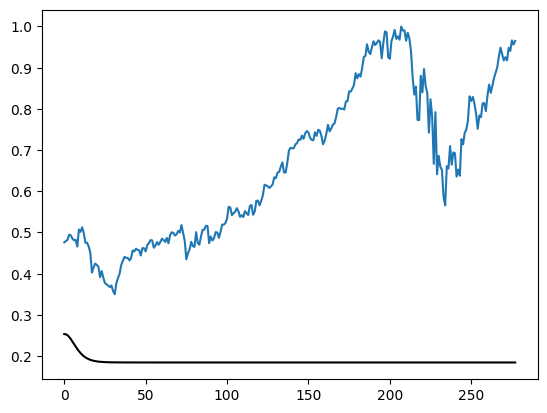

In [84]:
plt.plot(arrayans , color='black')
plt.plot(testy)
plt.show()